In [1]:
import requests
import json
from config import api_key_census
import census
from census import Census
import pandas as pd
import matplotlib.pyplot as plt
import us
from us import states
from scipy.stats import linregress
from scipy import stats
import numpy as np

In [2]:
## Open clean data files
census_workforce_2017_clean= pd.read_csv('HH_workforce2017_Clean_NN.csv')
census_workforce_2016_clean= pd.read_csv('HH_workforce2016_Clean_NN.csv')
census_workforce_2015_clean= pd.read_csv('HH_workforce2015_Clean_NN.csv')
census_workforce_2014_clean= pd.read_csv('HH_workforce2014_Clean_NN.csv')
census_workforce_2013_clean= pd.read_csv('HH_workforce2013_Clean_NN.csv')
census_workforce_2012_clean= pd.read_csv('HH_workforce2012_Clean_NN.csv')
census_workforce_2011_clean= pd.read_csv('HH_workforce2011_Clean_NN.csv')

census_value_cost_2017_clean= pd.read_csv('HH_Value_And_Cost2017_Clean_NN.csv')
census_value_cost_2016_clean= pd.read_csv('HH_Value_And_Cost2016_Clean_NN.csv')
census_value_cost_2015_clean= pd.read_csv('HH_Value_And_Cost2015_Clean_NN.csv')
census_value_cost_2014_clean= pd.read_csv('HH_Value_And_Cost2014_Clean_NN.csv')
census_value_cost_2013_clean= pd.read_csv('HH_Value_And_Cost2013_Clean_NN.csv')
census_value_cost_2012_clean= pd.read_csv('HH_Value_And_Cost2012_Clean_NN.csv')
census_value_cost_2011_clean= pd.read_csv('HH_Value_And_Cost2011_Clean_NN.csv')


In [3]:
### Create extra Dataframe for Houston Area and other cities to plot
## Creata a new column Average time travel to work
census_workforce_2017_clean["Average time travel to work"] =census_workforce_2017_clean["Aggregate travel time to work (in minutes)"].astype(int)/census_workforce_2017_clean["Total employed in civilian labor force"].astype(int)
census_workforce_2016_clean["Average time travel to work"] =census_workforce_2016_clean["Aggregate travel time to work (in minutes)"].astype(int)/census_workforce_2016_clean["Total employed in civilian labor force"].astype(int)
census_workforce_2015_clean["Average time travel to work"] =census_workforce_2015_clean["Aggregate travel time to work (in minutes)"].astype(int)/census_workforce_2015_clean["Total employed in civilian labor force"].astype(int)
census_workforce_2014_clean["Average time travel to work"] =census_workforce_2014_clean["Aggregate travel time to work (in minutes)"].astype(int)/census_workforce_2014_clean["Total employed in civilian labor force"].astype(int)
census_workforce_2013_clean["Average time travel to work"] =census_workforce_2013_clean["Aggregate travel time to work (in minutes)"].astype(int)/census_workforce_2013_clean["Total employed in civilian labor force"].astype(int)
census_workforce_2012_clean["Average time travel to work"] =census_workforce_2012_clean["Aggregate travel time to work (in minutes)"].astype(int)/census_workforce_2012_clean["Total employed in civilian labor force"].astype(int)
census_workforce_2011_clean["Average time travel to work"] =census_workforce_2011_clean["Aggregate travel time to work (in minutes)"].astype(int)/census_workforce_2011_clean["Total employed in civilian labor force"].astype(int)

census_workforce_2017_clean = census_workforce_2017_clean[["Zipcode", "Average time travel to work",
                                                           "Total employed in civilian labor force",
                                                           "Aggregate travel time to work (in minutes)"]]
census_workforce_2016_clean = census_workforce_2016_clean[["Zipcode", "Average time travel to work",
                                                           "Total employed in civilian labor force",
                                                           "Aggregate travel time to work (in minutes)"]]
census_workforce_2015_clean = census_workforce_2015_clean[["Zipcode", "Average time travel to work",
                                                           "Total employed in civilian labor force",
                                                           "Aggregate travel time to work (in minutes)"]]
census_workforce_2014_clean = census_workforce_2014_clean[["Zipcode", "Average time travel to work",
                                                           "Total employed in civilian labor force",
                                                           "Aggregate travel time to work (in minutes)"]]
census_workforce_2013_clean = census_workforce_2013_clean[["Zipcode", "Average time travel to work",
                                                           "Total employed in civilian labor force",
                                                           "Aggregate travel time to work (in minutes)"]]
census_workforce_2012_clean = census_workforce_2012_clean[["Zipcode", "Average time travel to work",
                                                           "Total employed in civilian labor force",
                                                           "Aggregate travel time to work (in minutes)"]]
census_workforce_2011_clean = census_workforce_2011_clean[["Zipcode", "Average time travel to work",
                                                           "Total employed in civilian labor force",
                                                           "Aggregate travel time to work (in minutes)"]]
## Second clean to be able to plot charts:
census_value_cost_2017_cleann= census_value_cost_2017_clean.drop([6])
census_value_cost_2016_cleann= census_value_cost_2016_clean.drop([47])
census_value_cost_2015_cleann= census_value_cost_2015_clean.drop([47])
census_value_cost_2014_cleann= census_value_cost_2014_clean.drop([55])
census_value_cost_2013_cleann= census_value_cost_2013_clean.drop([49])
census_value_cost_2012_cleann= census_value_cost_2012_clean.drop([19,63])
census_value_cost_2011_cleann= census_value_cost_2011_clean.drop([44])


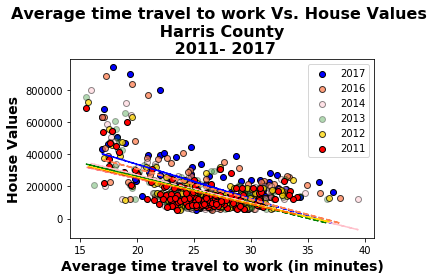

In [4]:
### Plot relationship between
## House Value vs Time travel to work with regression lines
plt.scatter(census_workforce_2017_clean["Average time travel to work"],
            census_value_cost_2017_cleann["Median Value"],
            edgecolor= "black", label="2017",
            c="blue")
(slope, intercept, _, _, _) = linregress(census_workforce_2017_clean["Average time travel to work"],census_value_cost_2017_cleann["Median Value"])
fit = slope * census_workforce_2017_clean["Average time travel to work"] + intercept
plt.plot(census_workforce_2017_clean["Average time travel to work"], fit, 'b--',color='blue')

plt.scatter(census_workforce_2016_clean["Average time travel to work"],
           census_value_cost_2016_cleann["Median Value"],
           edgecolor= "black",label="2016",
           c="coral", alpha=0.75)
(slope, intercept, _, _, _) = linregress(census_workforce_2016_clean["Average time travel to work"],census_value_cost_2016_cleann["Median Value"])
fit = slope * census_workforce_2016_clean["Average time travel to work"] + intercept
plt.plot(census_workforce_2016_clean["Average time travel to work"], fit, 'b--',color='coral')

plt.scatter(census_workforce_2014_clean["Average time travel to work"],
           census_value_cost_2014_cleann["Median Value"],
           edgecolor= "black",label="2014",
           c="pink", alpha=0.45)
(slope, intercept, _, _, _) = linregress(census_workforce_2014_clean["Average time travel to work"],census_value_cost_2014_cleann["Median Value"])
fit = slope * census_workforce_2014_clean["Average time travel to work"] + intercept
plt.plot(census_workforce_2014_clean["Average time travel to work"], fit, 'b--',color='pink')

plt.scatter(census_workforce_2013_clean["Average time travel to work"],
           census_value_cost_2013_cleann["Median Value"],
           edgecolor= "black",label="2013",
           c="green", alpha=0.30)
(slope, intercept, _, _, _) = linregress(census_workforce_2013_clean["Average time travel to work"],census_value_cost_2013_cleann["Median Value"])
fit = slope * census_workforce_2013_clean["Average time travel to work"] + intercept
plt.plot(census_workforce_2013_clean["Average time travel to work"], fit, 'b--',color='green')

plt.scatter(census_workforce_2012_clean["Average time travel to work"],
           census_value_cost_2012_cleann["Median Value"],
           edgecolor= "black",label="2012",
           c="gold", alpha=0.75)
(slope, intercept, _, _, _) = linregress(census_workforce_2012_clean["Average time travel to work"],census_value_cost_2012_cleann["Median Value"])
fit = slope * census_workforce_2012_clean["Average time travel to work"] + intercept
plt.plot(census_workforce_2012_clean["Average time travel to work"], fit, 'b--',color='gold')

plt.scatter(census_workforce_2011_clean["Average time travel to work"],
           census_value_cost_2011_cleann["Median Value"],
           edgecolor= "black",label="2011",
           c="red", alpha=1)
(slope, intercept, _, _, _) = linregress(census_workforce_2011_clean["Average time travel to work"],census_value_cost_2011_cleann["Median Value"])
fit = slope * census_workforce_2011_clean["Average time travel to work"] + intercept
plt.plot(census_workforce_2011_clean["Average time travel to work"], fit, 'b--',color='red', alpha=0.5)

plt.title("Average time travel to work Vs. House Values \n Harris County \n 2011- 2017", fontsize=16, fontweight="bold")
plt.xlabel("Average time travel to work (in minutes)",fontsize=14, fontweight="bold")
plt.ylabel("House Values",fontsize=14, fontweight="bold")
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [10, 8]
plt.savefig('Graph_Scatter_Travel_Time.png')
plt.show()

In [9]:
# Run test on Pearson correlation coefficient

r_2011_travel=np.corrcoef(census_workforce_2011_clean["Average time travel to work"], census_value_cost_2011_cleann["Median Value"])[0, 1]
r_2012_travel=np.corrcoef(census_workforce_2012_clean["Average time travel to work"], census_value_cost_2012_cleann["Median Value"])[0, 1]
r_2013_travel=np.corrcoef(census_workforce_2013_clean["Average time travel to work"], census_value_cost_2013_cleann["Median Value"])[0, 1]
r_2014_travel=np.corrcoef(census_workforce_2014_clean["Average time travel to work"], census_value_cost_2014_cleann["Median Value"])[0, 1]
r_2015_travel=np.corrcoef(census_workforce_2015_clean["Average time travel to work"], census_value_cost_2015_cleann["Median Value"])[0, 1]
r_2016_travel=np.corrcoef(census_workforce_2016_clean["Average time travel to work"], census_value_cost_2016_cleann["Median Value"])[0, 1]
r_2017_travel=np.corrcoef(census_workforce_2017_clean["Average time travel to work"], census_value_cost_2017_cleann["Median Value"])[0, 1]

year_list_r_value_travel=[2017,2016,2015,2014,2013,2012,2011]

r_value_harris_travel=[r_2011_travel,r_2012_travel,r_2013_travel,r_2014_travel,r_2015_travel,r_2017_travel,r_2017_travel]

r_sumary_harris_travel=pd.DataFrame({'Years': year_list_r_value_travel,'Pearson Correlation Coefficient':r_value_harris_travel})
r_sumary_harris_travel


,Years,Pearson Correlation Coefficient
0,2017,-0.562942
1,2016,-0.554513
2,2015,-0.561876
3,2014,-0.548619
4,2013,-0.167311
5,2012,-0.544950
6,2011,-0.544950


<Figure size 720x576 with 0 Axes>

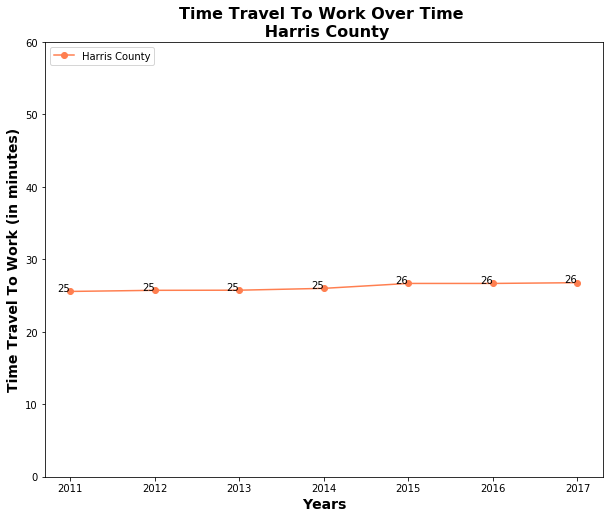

In [6]:
# Timelines graph
plt.figure(1)
median_workforce_2017=census_workforce_2017_clean['Average time travel to work'].mean()
median_workforce_2016=census_workforce_2016_clean['Average time travel to work'].mean()
median_workforce_2015=census_workforce_2015_clean['Average time travel to work'].mean()
median_workforce_2014=census_workforce_2014_clean['Average time travel to work'].mean()
median_workforce_2013=census_workforce_2013_clean['Average time travel to work'].mean()
median_workforce_2012=census_workforce_2012_clean['Average time travel to work'].mean()
median_workforce_2011=census_workforce_2011_clean['Average time travel to work'].mean()

fig = plt.figure()
ax = fig.add_subplot(111)
median_workforce_list = [median_workforce_2011,median_workforce_2012,median_workforce_2013,median_workforce_2014,median_workforce_2015,median_workforce_2016,median_workforce_2017]
year_list=['2011','2012','2013','2014','2015','2016','2017']

plt.plot(range(len(year_list)), median_workforce_list, marker='o', label="Harris County",color="coral") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(median_workforce_list):
    ax.text(i, v, "%d" %v, ha="right")

plt.legend(loc="upper left")
plt.title("Time Travel To Work Over Time \n Harris County",fontsize=16, fontweight="bold")
plt.xlabel('Years',fontsize=14, fontweight="bold")
plt.ylabel('Time Travel To Work (in minutes)',fontsize=14, fontweight="bold")
plt.ylim(0,60)
plt.savefig('Graph_Line_Travel_Houston.png')